# zfitter
zfit wrapper for lazy analysits [GitHub](https://github.com/mzks/zfitter)

Author: Keita Mizukoshi (Kobe Univ. mzks@stu.kobe-u.ac.jp, @mzks)

## Concept
[`zfit`](https://github.com/zfit/zfit) is a nice fitting tools on python, built on object-oriented interface.
However, I would sometime like to fit easily. I do *not always* want to care minimizers and cost function.
I usually take an approach for good fitting, try-error-retry with visual environment.
For that purpose, raw `zfit` is slightly much.
To prevent tenosynovitis of lazy analysts, I made a wrapper of `zfit`, `zfitter`

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# generate sample data
data = np.random.normal(11, 4, 10000)

### Make 1-d histogram of data

In [4]:
from zfitter import zfitter
zf = zfitter(data)

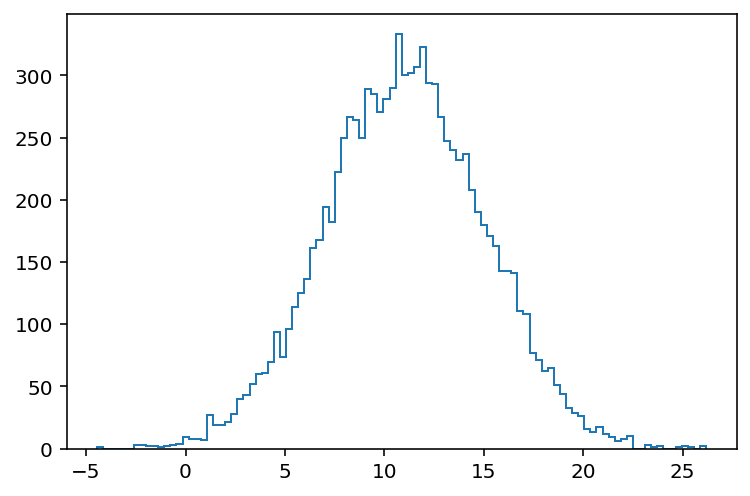

In [5]:
# If you want, number of bins and ranges can be set.
#zf.set_bins(200) # Number of bins
#zf.set_data_range(0, 25) # Range for data
#zf.set_range(5, 15) # Range for fitting

# Let's visualize! zfitter always provides `draw()` to visualize even before definition of model.
zf.draw()

### Model

In [6]:
zf.set_model('gauss') # I would like to use gaussian. But,... which parameters can be used? This method prints parameter list.

Parameters
mu : 0.0
sigma : 1.0


/Users/mzks/zfit_test/zfitter/zfitter/core.py:117: UserWarning: The function <function Space.area at 0x1460f69e0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[-4.43454781]]), array([[26.17315104]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  scale_factor = n_sample/self.fit_bins*self.obs.area()


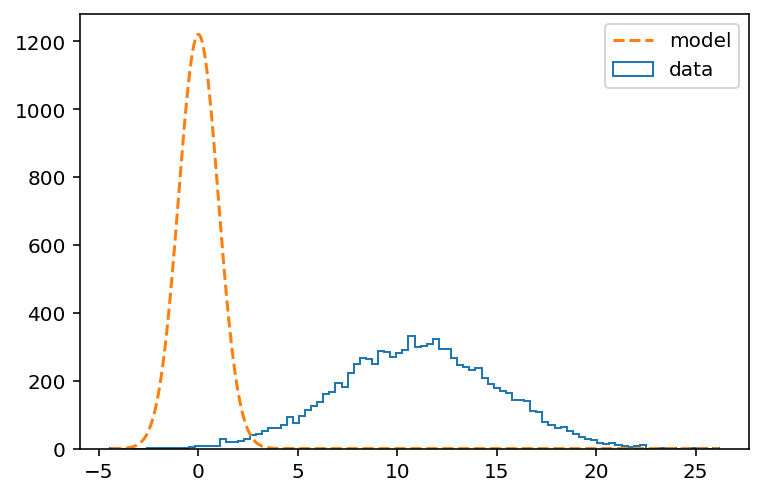

In [7]:
# Before fitting
zf.draw(); # Always can be used!
plt.legend()

The initial valeues of the model is not good.
Set better values manually and re-draw.

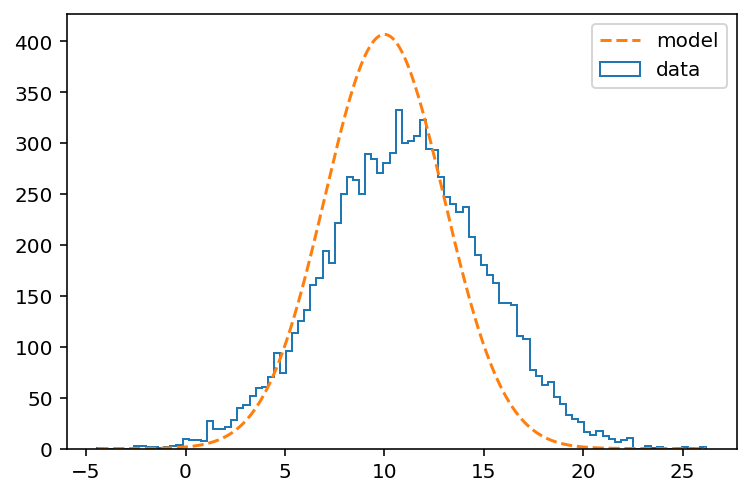

In [8]:
zf.set_parameter('mu', 10)
zf.set_parameter('sigma', 3)
zf.draw()
plt.legend()

This is not perfect, but it is enough to fit. The rest work is fitter's one.
If you don't like the initial values, you can go back and re-set parameters.

In [9]:
zf.fit()

/Users/mzks/zfit_test/zfit/zfit/util/cache.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return all(np.equal(self.immutable_representation, other.immutable_representation))


FitResult of
<UnbinnedNLL model=[<zfit.Gauss  params=[mu, sigma] dtype=float64>0] data=[<zfit.core.data.Data object at 0x147ab7f10>] constraints=[]> 
with
<Adam strategy=PushbackStrategy tolerance=1e-05>

╒═════════╤═════════════╤══════════════════╤═══════╤═══════════════════╕
│ valid   │ converged   │ param at limit   │ edm   │ min value         │
╞═════════╪═════════════╪══════════════════╪═══════╪═══════════════════╡
│ True    │ True        │ False            │ -999  │ 27984.17139809929 │
╘═════════╧═════════════╧══════════════════╧═══════╧═══════════════════╛

Parameters
name      value    at limit
------  -------  ----------
mu        11.04       False
sigma     3.977       False

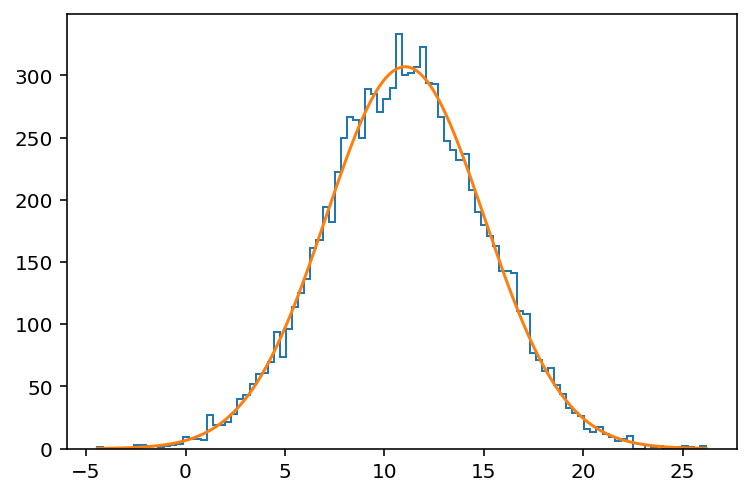

In [10]:
zf.draw()

It looks nice.

## User model

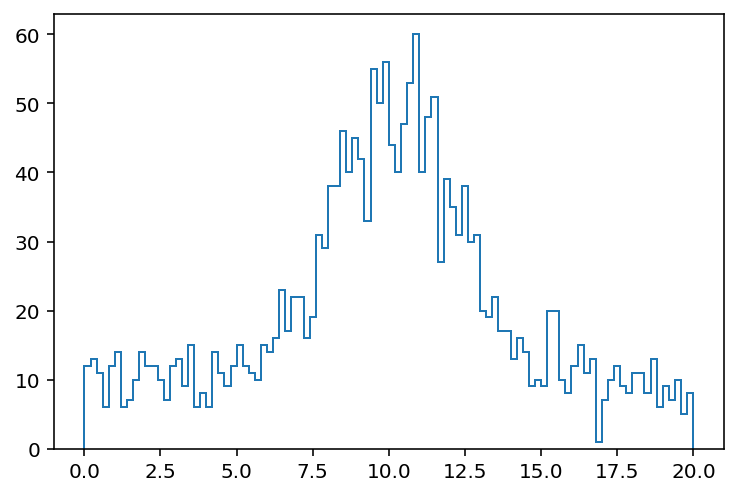

In [11]:
# Data is not on simple gaussian
signal = np.random.normal(10, 2, 1000)
background = np.random.uniform(0, 20, 1000)
data = np.concatenate([signal, background])
zf2 = zfitter(data)
zf2.draw()

In [14]:
# User model as python function
from zfit import z
def user_func(x, mu=10, sigma=2, C=1):
    return z.exp(-z.square((x - mu) / sigma)) + C

zf2.set_model_func(user_func)

Parameters
C : 1.0
mu : 10.0
sigma : 2.0


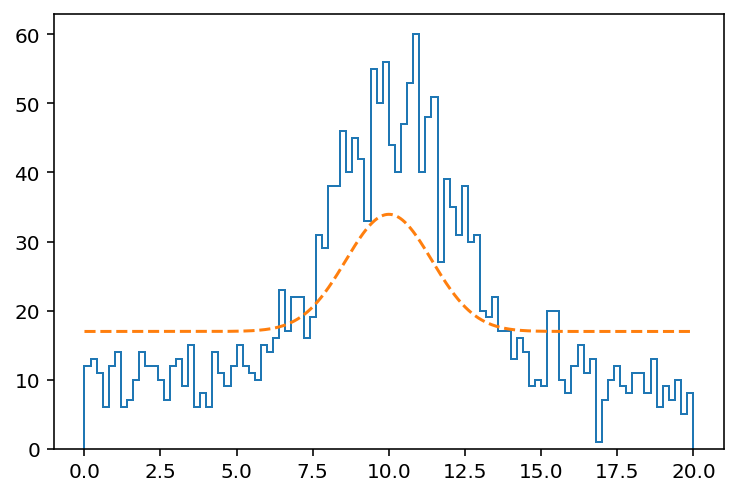

In [15]:
zf2.draw()

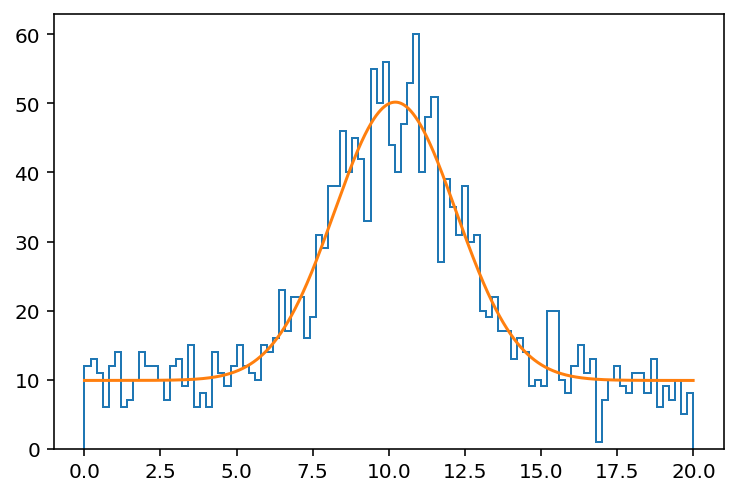

In [17]:
zf2.fit()
zf2.draw()